## The Forward Pass, or how the NFL Beat AI to the Punch by Decades
OK, not exactly, but the NFL did officially recognize the forward pass in 1906, and Frank Rosenblatt’s Perceptron didn’t come about until 1958. Initially, without seeing how the data changes after the matrix multiplication and the application of weights and biases (the forward pass), it can be hard to distinguish the before and after of the forward pass. We know it happens but sometimes that just isn’t good enough. So, lets throw in some before and after plots. <br> </br>
The typical workflow for building a neural network would be: \
    1. **Data Generation or Loading**: Start by preparing your dataset, whether it’s through random generation or loading from an external source. We’ll be generating our own code. \
    2. **Data Preprocessing**: This is usually the step where you clean, normalize, or prepare the data for training (not covered here). \
    3. **Define the Neural Network**: Define your layers, activation functions, etc. \
    4. **Forward Pass**: Pass the data through the network to get the output. \
    5. **Loss Function, Backpropagation**: Compute the loss, and update weights and biases (not covered yet in this example, but necessary for training the network).

In [1]:
pip install nnfs

  Using cached nnfs-0.5.1-py3-none-any.whl.metadata (1.7 kB)
Using cached nnfs-0.5.1-py3-none-any.whl (9.1 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import nnfs #from here: https://github.com/Sentdex/nnfs_book/blob/main/Chapter_3/Ch3_Final.py
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
nnfs.init()

**Subplot 1 (Original Spiral Data):** 

- This is scatter plot of the original spiral data from nnfs. The data is in 2D with each point colored by its class.

**Subplot 2 (Transformed Data):**

- After performing the forward pass, the output of the dense layer is 3D (3 neurons). We use only the first two outputs (dense1.output[:, 0] and dense1.output[:, 1]) to represent the transformed data in 2D.

- This scatter plot will show how the positions of the points have changed after the data passed through the dense layer. The transformed data is no longer a spiral but will reflect the transformation the neural network applied.

- Note that the scale of the second scatter plot has changed because of this: *self.weights = 0.01*. Due to the small number laying the plotted points on top of one another they would be indistinguishable, so I changed the amount in the next set of plots.

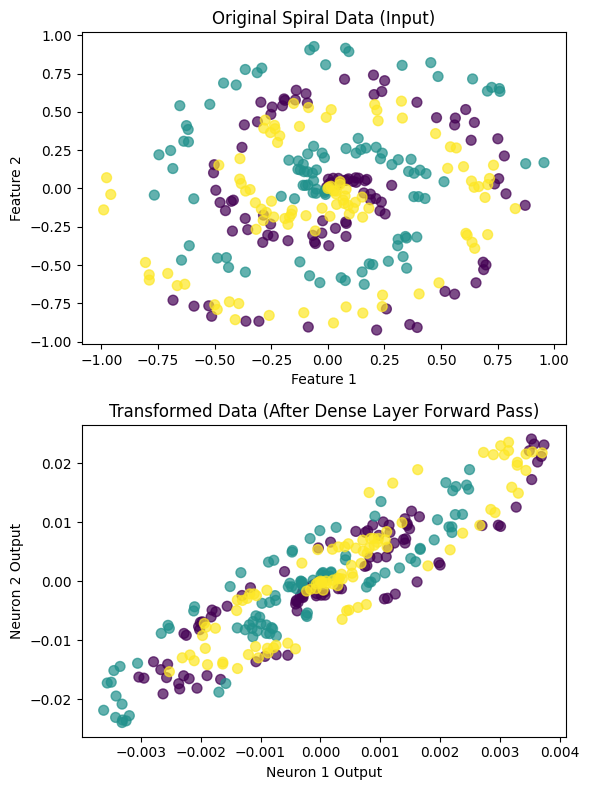

In [4]:
#Generate spiral data, shape(300, 2)
X, y = spiral_data(samples=100, classes=3)

# Define the Layer_Dense class
class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)  # Small random weights
        self.biases = np.zeros((1, n_neurons))  # Initialize biases to zero

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights, and biases
        self.output = np.dot(inputs, self.weights) + self.biases

# Define the neural network layer with 2 inputs (for 2D data) and 3 output neurons, shape(2, 3)
dense1 = Layer_Dense(2, 3)

# Perform the forward pass with the spiral data
dense1.forward(X)

# Plot the original spiral data (before the forward pass)
plt.figure(figsize=(6, 8))

# Subplot 1: Original Spiral Data
plt.subplot(2, 1, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.title("Original Spiral Data (Input)")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Subplot 2: Transformed Output (Output from Dense Layer)
# We will take the first two outputs (neurons) of the dense layer for plotting as a 2D spiral
plt.subplot(2, 1, 2)
# Plot the first two output neurons (to maintain 2D coordinates)
plt.scatter(dense1.output[:, 0], dense1.output[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.title("Transformed Data (After Dense Layer Forward Pass)")
plt.xlabel('Neuron 1 Output')
plt.ylabel('Neuron 2 Output')

plt.tight_layout()

Scale changed to: *self.weights = 0.5*. Orignal data are the larger more opaque dots, with the transformed dots being being smaller with more transparency. 

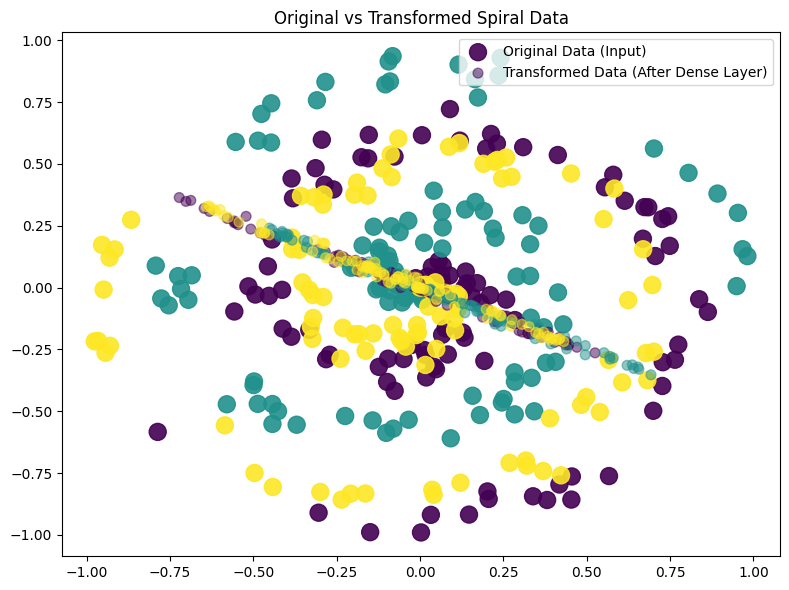

In [16]:
#Generate spiral data, shape(300, 2)
X, y = spiral_data(samples=100, classes=3)

# Define the Layer_Dense class
class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights with a larger scale to make the transformation more noticeable
        self.weights = 0.5 * np.random.randn(n_inputs, n_neurons)  # Larger random weights for visible transformation
        self.biases = np.zeros((1, n_neurons))  # Initialize biases to zero

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights, and biases
        self.output = np.dot(inputs, self.weights) + self.biases

# Define the neural network layer with 2 inputs (for 2D data) and 3 output neurons, shape(2,3)
dense1 = Layer_Dense(2, 3)

# Perform the forward pass with the spiral data
dense1.forward(X)

# Plot the original and transformed spiral data in a single plot
plt.figure(figsize=(8, 6))

# Plot the original spiral data with large points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=150, alpha=0.9, label='Original Data (Input)')

# Plot the transformed data (output from the dense layer) with smaller points
plt.scatter(dense1.output[:, 0], dense1.output[:, 1], c=y, cmap='viridis', s=50, alpha=0.5, label='Transformed Data (After Dense Layer)')

# Set plot title and labels
plt.title("Original vs Transformed Spiral Data")

plt.legend(loc='upper right')
plt.tight_layout();

Here's a second one just for fun. If you refresh the cell it will generate a new spiral each time.

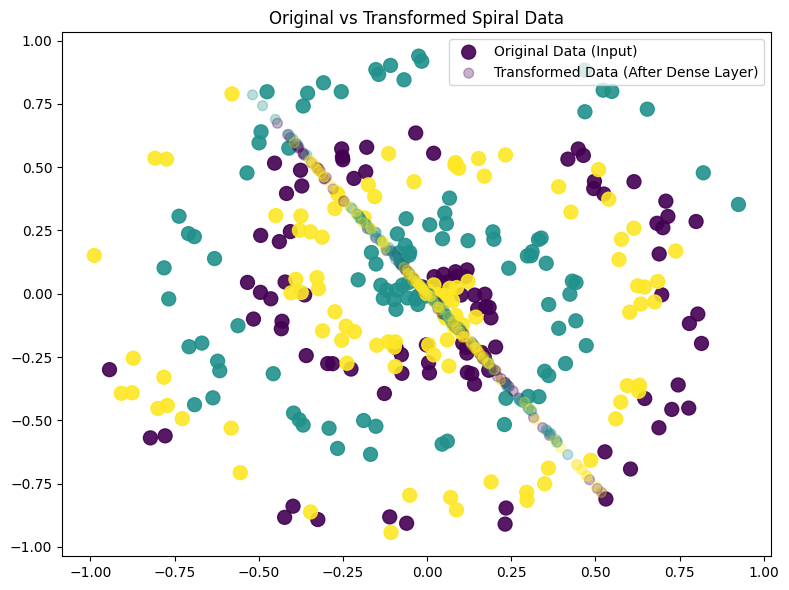

In [26]:
#Generate spiral data, shape(300, 2)
X, y = spiral_data(samples=100, classes=3)

# Define the Layer_Dense class
class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights with a larger scale to make the transformation more noticeable
        self.weights = 0.5 * np.random.randn(n_inputs, n_neurons)  # Larger random weights for visible transformation
        self.biases = np.zeros((1, n_neurons))  # Initialize biases to zero

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights, and biases
        self.output = np.dot(inputs, self.weights) + self.biases

# Define the neural network layer with 2 inputs (for 2D data) and 3 output neurons, shape(2, 3)
dense1 = Layer_Dense(2, 3)

# Perform the forward pass with the spiral data
dense1.forward(X)

# Plot the original and transformed spiral data in a single plot
plt.figure(figsize=(8, 6))

# Plot the original spiral data with large points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=100, alpha=0.9, label='Original Data (Input)')

# Plot the transformed data (output from the dense layer) with smaller points
plt.scatter(dense1.output[:, 0], dense1.output[:, 1], c=y, cmap='viridis', s=50, alpha=0.3, label='Transformed Data (After Dense Layer)')

# Set plot title and labels
plt.title("Original vs Transformed Spiral Data")
plt.legend(loc='upper right')

plt.tight_layout();

In this plot the transformed data is a narrow band and nearly verticle.

And then I was getting excited about this, and wondered if something similar could be done with a sine wave.

**Explanation:** \
    1. Wave Data Generation: \
        ◦ The wave_data() function generates 2 features for each sample, with sine and cosine waveforms (or you can use just sine or cosine alone). \
        ◦ Each sample has 2 features (sine and cosine values), and we also generate y values, but we won't use them in this example since we’re focused on the waveforms. \
    2. **Layer_Dense Class:** \
        ◦ The Layer_Dense class performs the forward pass using matrix multiplication. We initialize the weights and biases randomly. \
    3. **Forward Pass:** \
        ◦ We pass the data X (which contains sine and cosine values) through the dense layer and calculate the output. \
    4. **Oscilloscope-like Line Graph:** \
        ◦ In the first plot, we plot the original sine and cosine waveforms (the input data).
        ◦ In the second plot, we plot the output from the dense layer for each of the 3 neurons (features of the output after the forward pass).

In [17]:
# Function to generate wave data
def wave_data(samples, n_classes, wave_type='sine'):
    # Create an empty array to hold the dataset
    X = np.zeros((samples, 2))  # 2 features for 2D (you can expand to more if needed)
    y = np.zeros(samples)

    # Generate wave-like data
    for i in range(samples):
        # Generate a wave with different frequencies
        x_val = i / float(samples) * 4 * np.pi  # Map sample index to a value over the range of [0, 4π] (full wave cycle)
        
        if wave_type == 'sine':
            X[i, 0] = np.sin(x_val)  # sine wave for the first feature
        elif wave_type == 'cosine':
            X[i, 0] = np.cos(x_val)  # cosine wave for the first feature
        elif wave_type == 'sine_cosine':
            X[i, 0] = np.sin(x_val)  # sine wave for the first feature
            X[i, 1] = np.cos(x_val)  # cosine wave for the second feature
        
        # Assign a label to each sample based on the wave position
        y[i] = int(x_val // (2 * np.pi) % n_classes)  # Assign label based on the wave cycle

    return X, y

# Generate wave data
n_samples = 100  # Number of samples
n_classes = 5    # Number of output classes
X, y = wave_data(n_samples, n_classes, wave_type='sine_cosine')

class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)  # Small random weights
        self.biases = np.zeros((1, n_neurons))  # Initialize biases to zero

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights, and biases
        self.output = np.dot(inputs, self.weights) + self.biases

# Create a dense layer with 2 input features (sine and cosine) and 3 output neurons
dense1 = Layer_Dense(n_inputs=2, n_neurons=3)

# Perform a forward pass of the wave data through the dense layer
dense1.forward(X)

**First Graph (Before):** \
The original wave data (input features) is plotted here. This graph shows the sine and cosine waves for the 2 input features (the data before passing through the dense layer). These are the raw waveforms created.

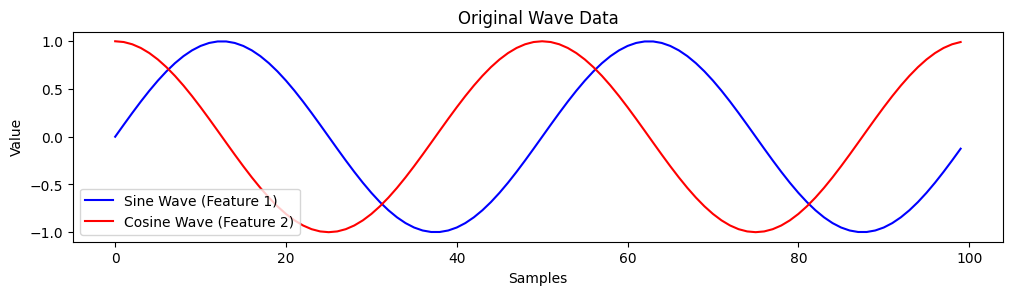

In [18]:
# Plot the original waveforms (input data) as line graphs
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(X[:, 0], label='Sine Wave (Feature 1)', color='blue', linewidth=1.5)
plt.plot(X[:, 1], label='Cosine Wave (Feature 2)', color='red', linewidth=1.5)
plt.title("Original Wave Data")
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend();

**Second Graph (After):** \
The output from the dense layer is plotted here. After the forward pass through the dense layer, the data gets transformed by the weights and biases. Each of the 3 neurons produces a separate output waveform. This graph shows the result of the transformation that the dense layer applies to the input data.

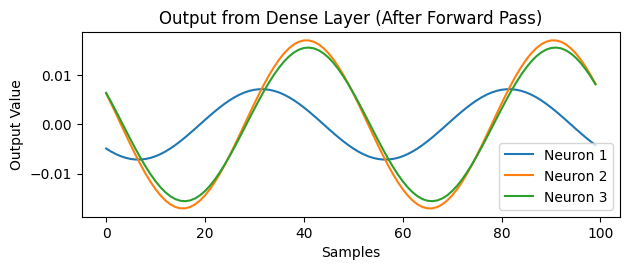

In [19]:
# Plot the output waveforms after the forward pass through the dense layer
plt.subplot(2, 1, 2)
for i in range(dense1.output.shape[1]):  # Iterate over the 3 output neurons
    plt.plot(dense1.output[:, i], label=f'Neuron {i+1}', linewidth=1.5)

plt.title("Output from Dense Layer (After Forward Pass)")
plt.xlabel('Samples')
plt.ylabel('Output Value')
plt.legend()
plt.tight_layout();

Each of the 3 lines in the second graph represents one of the neurons' outputs after applying the transformation, and you see how the waveforms change compared to the input data. 

This before-and-after really helped me to make it easier to track and visualize how a neural network processes and transforms input data into something entirely different based on learned weights. Seeing the change gave me that 'aha' moment even though we're told about passing the data via the *forward pass* through the network to get the output.

**Resources:** \
*Neural Networks from Scracth in Python*, Harrison Kinsley & Daniel Kukiela